LEONARDO SANTOS DE ANDRADE QUIRINO | 11.121.422-7

In [375]:
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import pandas as pd

pokedex = pd.read_csv('pokemon_alopez247.csv')
pokedex

Number        Name   Type_1  Type_2  Total   HP  Attack  Defense  Sp_Atk  \
0         1   Bulbasaur    Grass  Poison    318   45      49       49      65   
1         2     Ivysaur    Grass  Poison    405   60      62       63      80   
2         3    Venusaur    Grass  Poison    525   80      82       83     100   
3         4  Charmander     Fire     NaN    309   39      52       43      60   
4         5  Charmeleon     Fire     NaN    405   58      64       58      80   
..      ...         ...      ...     ...    ...  ...     ...      ...     ...   
716     717     Yveltal     Dark  Flying    680  126     131       95     131   
717     718     Zygarde   Dragon  Ground    600  108     100      121      81   
718     719     Diancie     Rock   Fairy    600   50     100      150     100   
719     720       Hoopa  Psychic   Ghost    600   80     110       60     150   
720     721   Volcanion     Fire   Water    600   80     110      120     130   

     Sp_Def  ...   Color  hasGender  Pr_Male   Egg_Group_1  Egg_Group_2  \
0        65  ...   Green       True    0.875       Monster        Grass   
1        80  ...   Green       True    0.875       Monster        Grass   
2       100  ...   Green       True    0.875       Monster        Grass   
3        50  ...     Red       True    0.875       Monster       Dragon   
4        65  ...     Red       True    0.875       Monster       Dragon   
..      ...  ...     ...        ...      ...           ...          ...   
716      98  ...     Red      False      NaN  Undiscovered          NaN   
717      95  ...   Green      False      NaN  Undiscovered          NaN   
718     150  ...    Pink      False      NaN  Undiscovered          NaN   
719     130  ...  Purple      False      NaN  Undiscovered          NaN   
720      90  ...   Brown      False      NaN  Undiscovered          NaN   

     hasMegaEvolution Height_m Weight_kg  Catch_Rate       Body_Style  
0               False     0.71       6.9          45        quadruped  
1               False     0.99      13.0          45        quadruped  
2                True     2.01     100.0          45        quadruped  
3               False     0.61       8.5          45   bipedal_tailed  
4               False     1.09      19.0          45   bipedal_tailed  
..                ...      ...       ...         ...              ...  
716             False     5.79     203.0          45        two_wings  
717             False     5.00     305.0           3  serpentine_body  
718              True     0.71       8.8           3        head_arms  
719             False     0.51       9.0           3        head_only  
720             False     1.70     195.0           3        quadruped  

[721 rows x 23 columns]

Para realizar o agrupamento será utilizado o dataset pokemon_alopez247.csv, um dataset com 721 Pokémon diferentes. Esse dataset apresenta diversas informações, como: atributos de batalha, altura, peso, cor, grupo de ovo, etc, etc. Todo pokémon tem seus prórpios status de batalha (ataque, defesa, velocidade...) e esses dados não são únicos para cada Pokémon. O meu objetivo é treinar o algoritmo para que ele agrupe os Pokémon com base nos status de batalha.

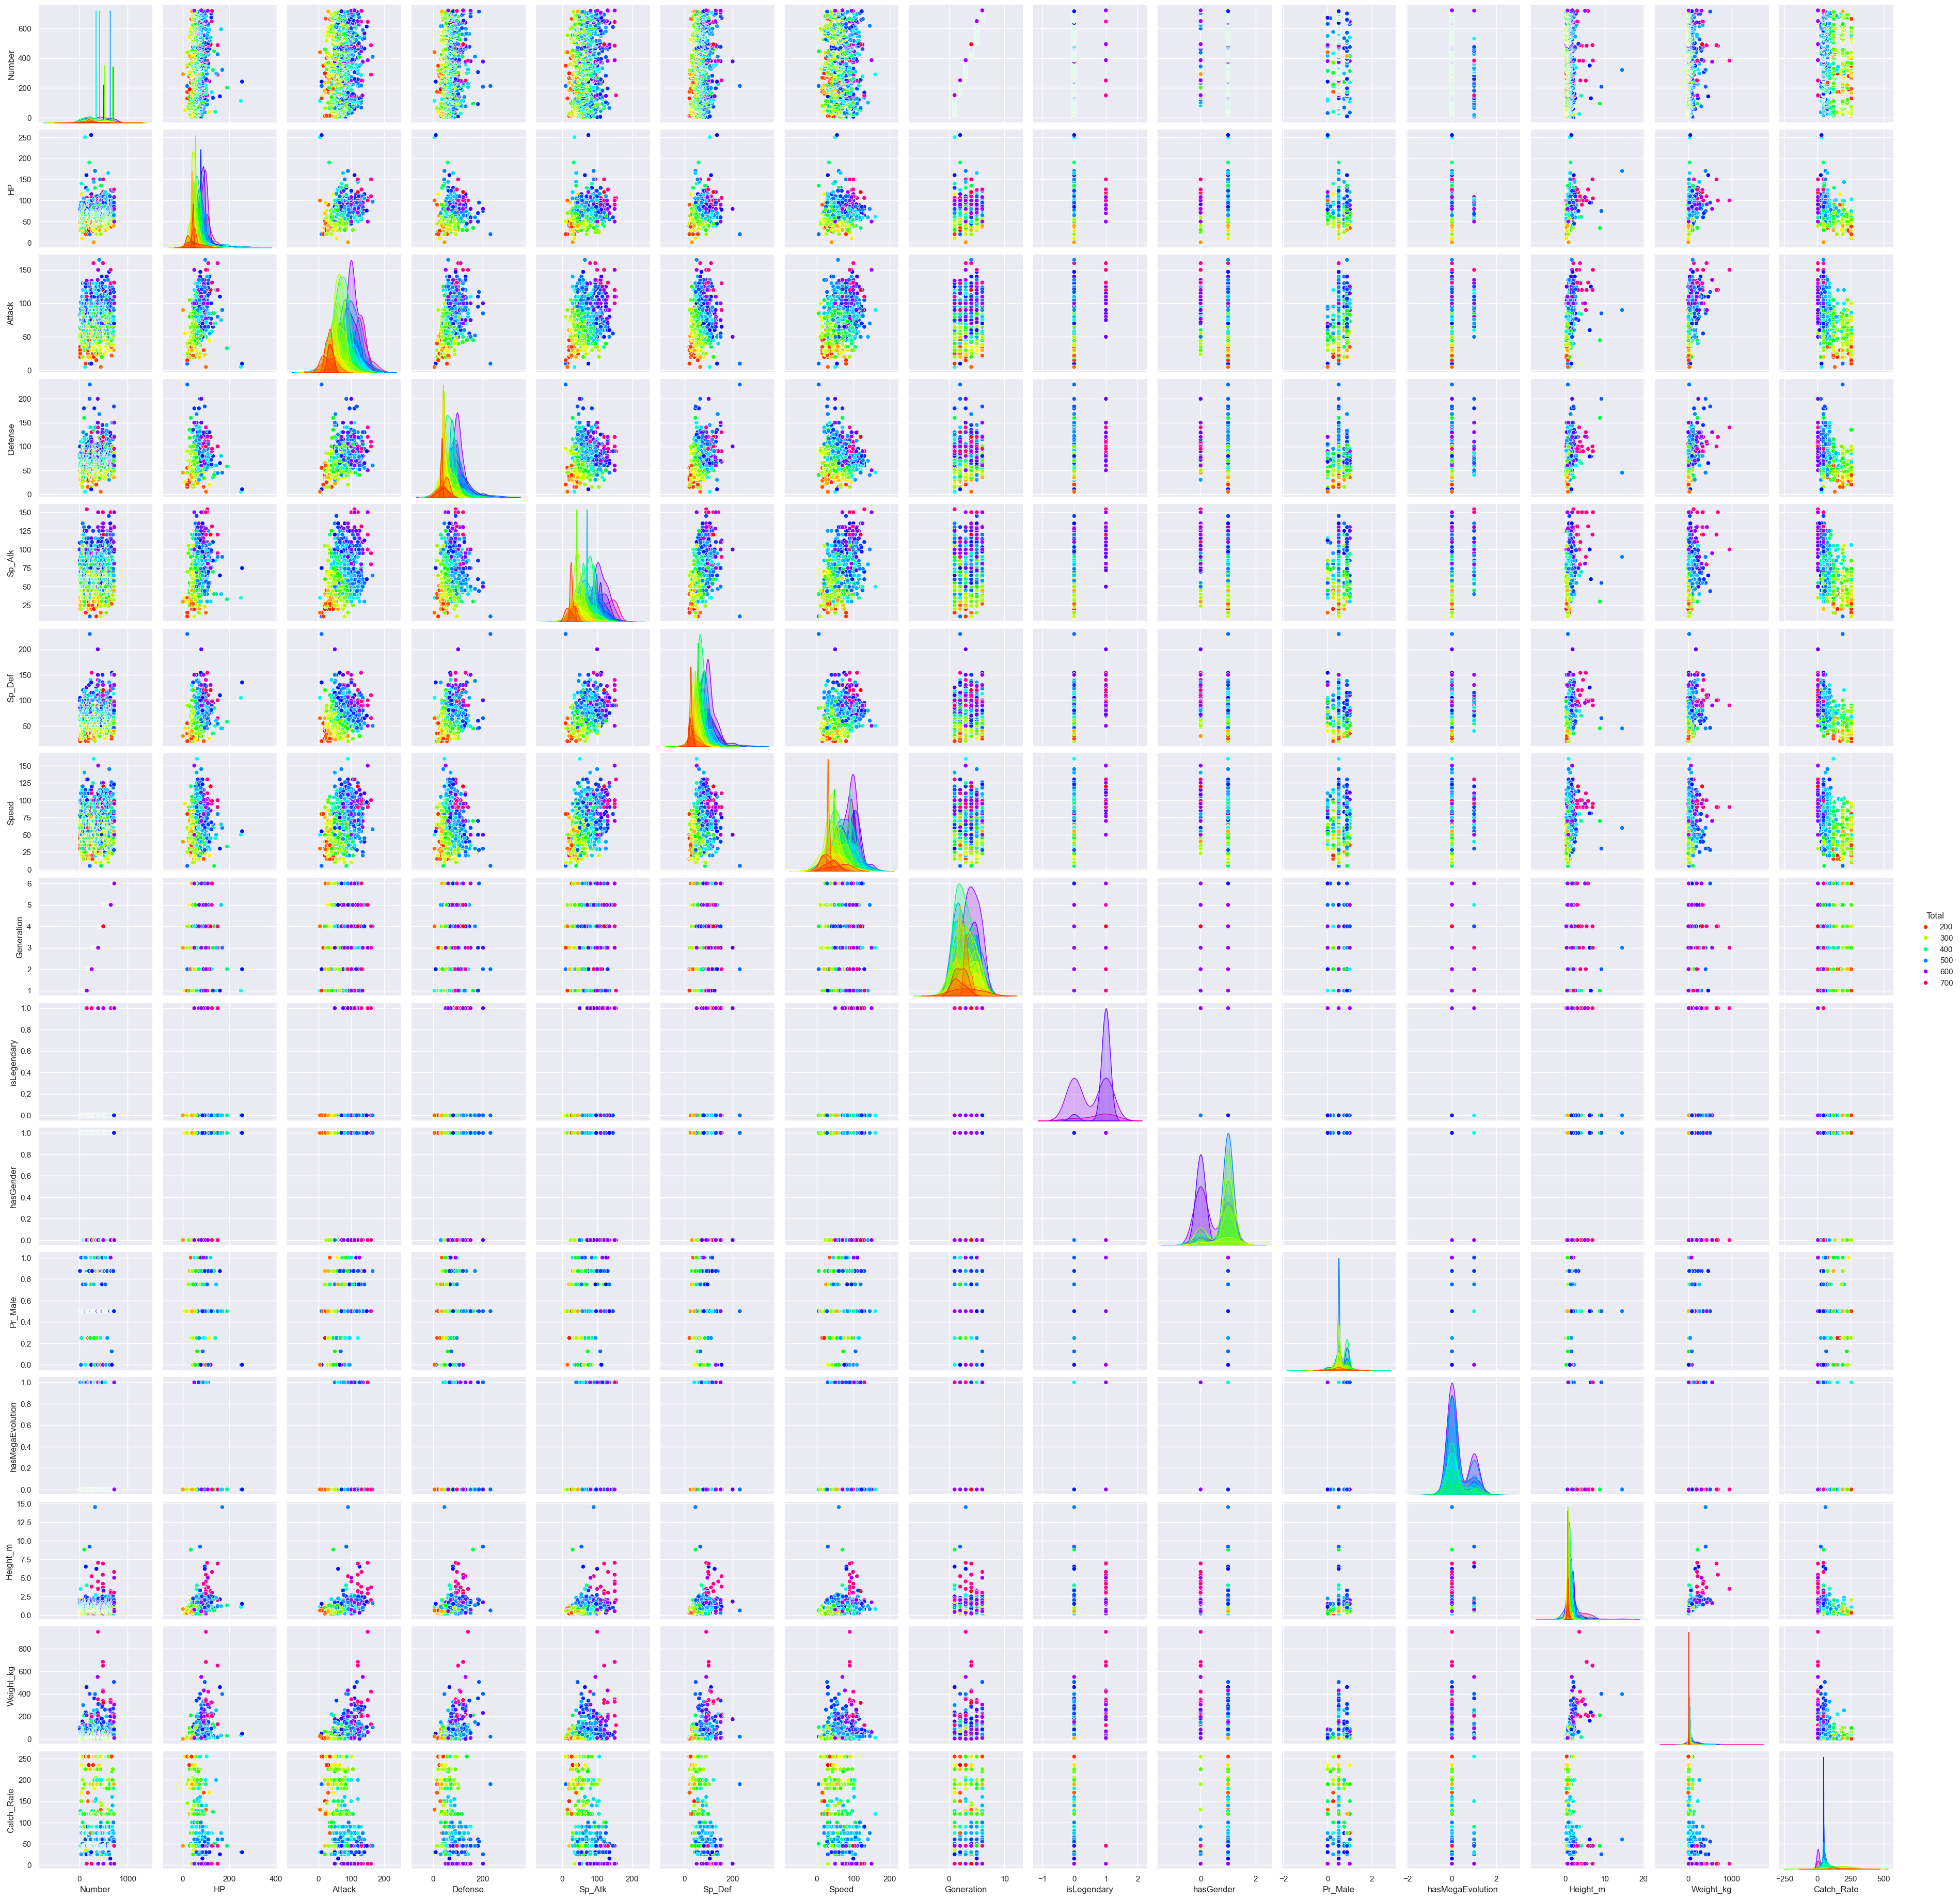

In [376]:
# exibe todos os gráficos de distribuição dos Pokémon de acordo com o tipo
sns.pairplot(pokedex, hue='Total', palette="hsv")

<Axes: >

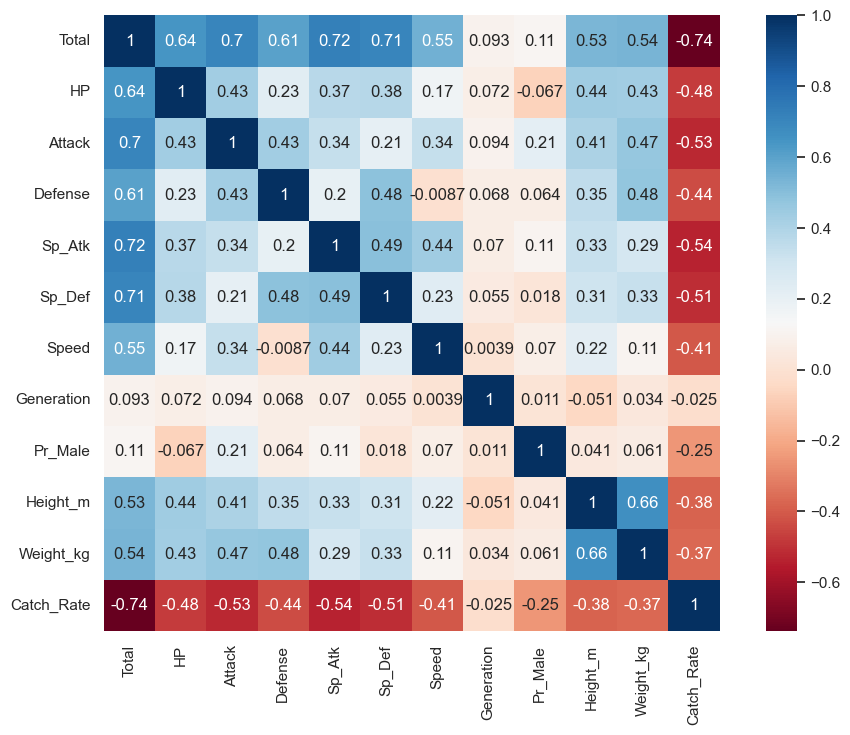

In [377]:
# gráfico de correlação dos dados numéricos
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(pokedex.iloc[:,[4,5,6,7,8,9,10,11,15,19,20,21]].corr(), annot=True, cmap='RdBu', square=True)

<Axes: >

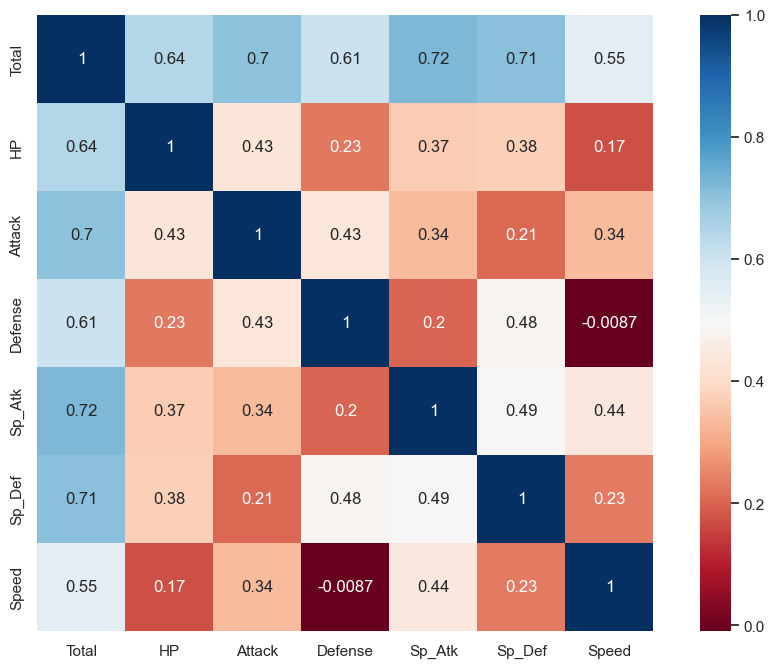

In [378]:
# gráfico de correlação baseados nos atributos físicos dos Pokémon, será bom para a análise a ser feita no agrupamento
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(pokedex.iloc[:,[4,5,6,7,8,9,10]].corr(), annot=True, cmap='RdBu', square=True)

In [420]:
entrada = pokedex.iloc[:,[4,5,6,7,8,9,10]].values
entrada

array([[318,  45,  49, ...,  65,  65,  45],
       [405,  60,  62, ...,  80,  80,  60],
       [525,  80,  82, ..., 100, 100,  80],
       ...,
       [600,  50, 100, ..., 100, 150,  50],
       [600,  80, 110, ..., 150, 130,  70],
       [600,  80, 110, ..., 130,  90,  70]])

In [451]:
pca = PCA(n_components=2)
entradaPCA = pca.fit_transform(entrada)
componentes = pca.components_
print(componentes)

[[ 0.92493071  0.13984073  0.17244933  0.14993341  0.17620884  0.16112001
   0.12537839]
 [-0.0085008   0.01788304  0.09350777  0.68828336 -0.35658662  0.15368588
  -0.60527422]]


Text(0, 0.5, 'inertia')

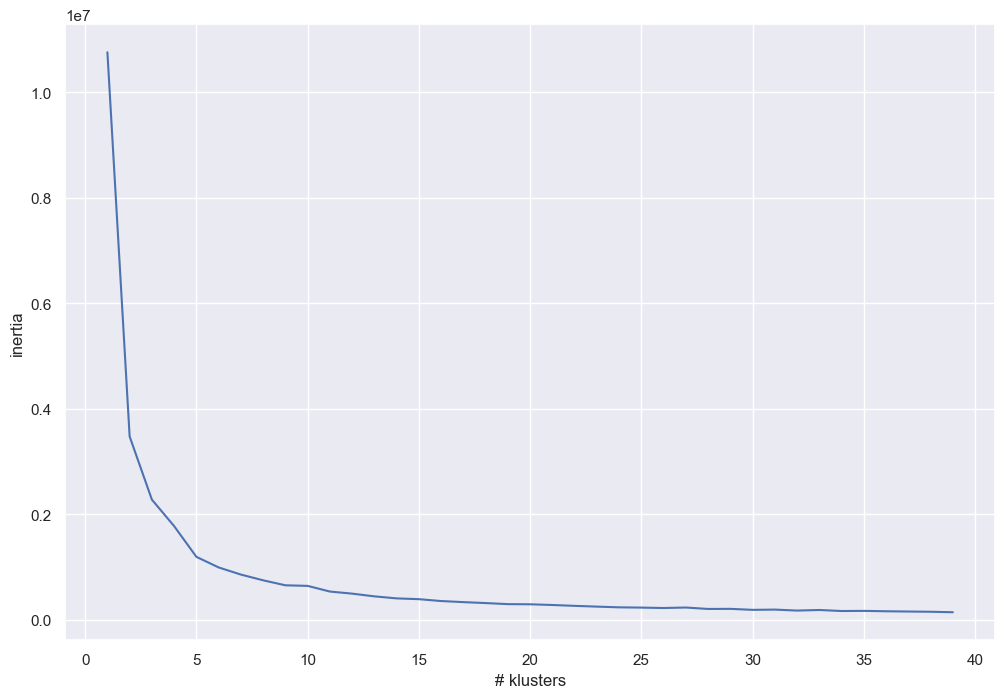

In [452]:
inertia=[]
for i in range(1,40):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(entradaPCA)
    inertia.append(kmeans.inertia_)

plt.plot(list(range(1,40)), inertia)
plt.xlabel("# klusters")
plt.ylabel("inertia")

Com base nos resultados retornados pela função pca.components_ e no gráfico de correlação dos status de batalha, optei por fazer as entradas do Feature Scaling e sem nada serem os pontos Totais (apresentou a maior contribuição no PCA) dos Pokémon e seus pontos de defesa especial (teve o valor mais alto de correlação com os valores Totais). Isso, provavelmente vai me gerar um gráfico mais parecido com o do PCA e facilitará a comparação dos 3 gráficos de cada método 

In [453]:
scaler = StandardScaler()
entradaFS = scaler.fit_transform(entrada[:,[0,5]])
entradaFS

array([[-0.91201845, -0.1589526 ],
       [-0.11813297,  0.39666225],
       [ 0.97688148,  1.13748204],
       ...,
       [ 1.66126551,  2.98953151],
       [ 1.66126551,  2.24871172],
       [ 1.66126551,  0.76707214]])

Text(0, 0.5, 'inertia')

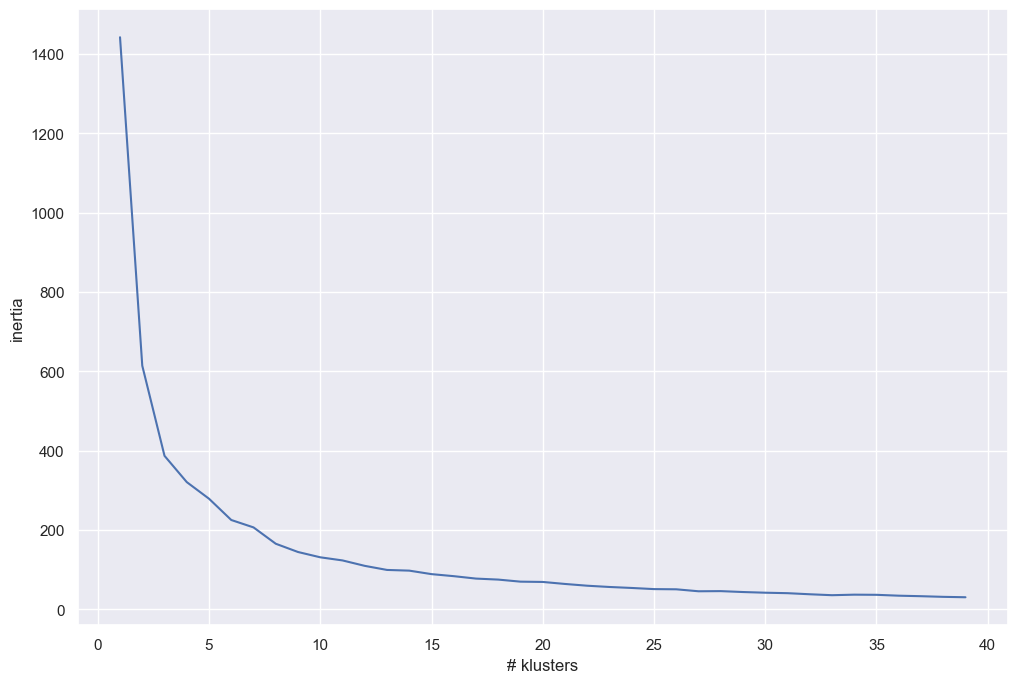

In [454]:
inertia=[]
for i in range(1,40):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(entradaFS)
    inertia.append(kmeans.inertia_)

plt.plot(list(range(1,40)), inertia)
plt.xlabel("# klusters")
plt.ylabel("inertia")

In [455]:
entradapadrao = entrada[:,[0,5]]
entradapadrao

array([[318,  65],
       [405,  80],
       [525, 100],
       ...,
       [600, 150],
       [600, 130],
       [600,  90]])

Text(0, 0.5, 'inertia')

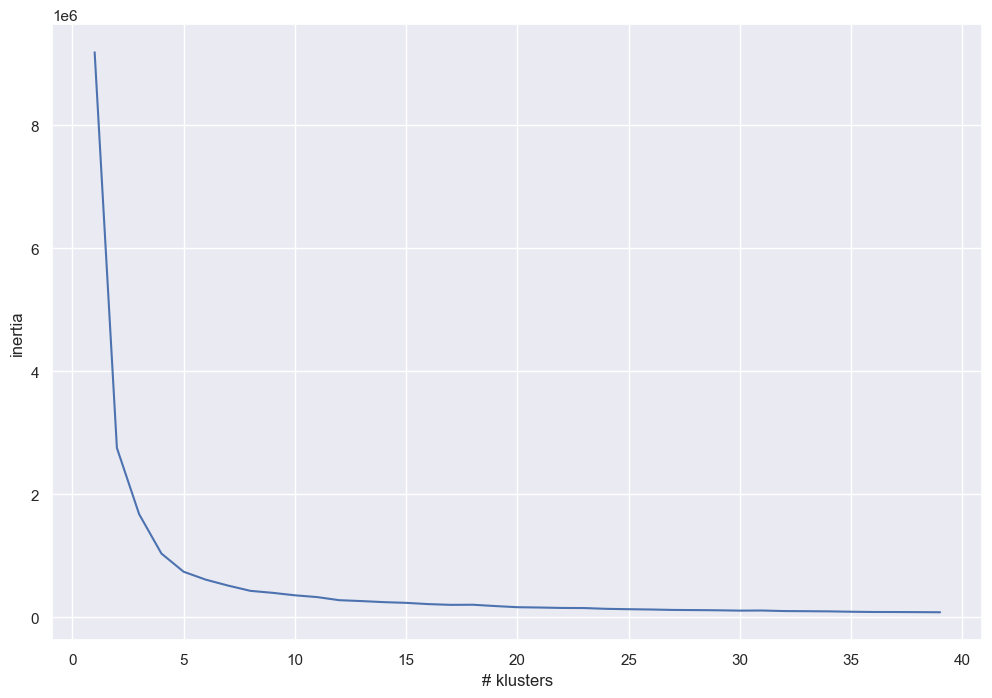

In [456]:
inertia=[]
for i in range(1,40):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(entradapadrao)
    inertia.append(kmeans.inertia_)

plt.plot(list(range(1,40)), inertia)
plt.xlabel("# klusters")
plt.ylabel("inertia")

KMEANS COM PCA

In [457]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeansPCA = kmeans.fit_predict(entradaPCA)
kmeansPCA

array([3, 2, 1, 3, 2, 1, 8, 9, 1, 0, 0, 2, 0, 0, 2, 0, 4, 7, 0, 2, 3, 7,
       3, 2, 3, 7, 8, 9, 3, 4, 1, 3, 4, 1, 8, 7, 3, 1, 3, 2, 0, 7, 8, 9,
       7, 8, 9, 8, 7, 3, 2, 3, 2, 3, 1, 3, 7, 4, 1, 3, 2, 6, 3, 2, 1, 8,
       9, 6, 3, 2, 7, 4, 1, 8, 9, 6, 2, 1, 8, 6, 4, 7, 4, 3, 7, 8, 7, 8,
       6, 8, 6, 3, 2, 1, 9, 4, 7, 8, 6, 4, 7, 8, 1, 8, 9, 7, 7, 9, 8, 6,
       8, 6, 7, 9, 7, 3, 7, 8, 7, 4, 1, 7, 1, 7, 7, 1, 6, 7, 0, 1, 1, 3,
       4, 1, 1, 1, 9, 4, 6, 4, 6, 1, 6, 5, 5, 5, 3, 2, 5, 5, 5, 8, 9, 1,
       3, 2, 1, 8, 9, 1, 0, 2, 3, 7, 3, 2, 0, 9, 1, 4, 7, 0, 0, 0, 0, 9,
       3, 7, 3, 4, 1, 6, 0, 9, 9, 1, 0, 4, 7, 4, 0, 2, 2, 0, 9, 1, 6, 2,
       6, 2, 4, 9, 7, 8, 6, 9, 9, 6, 8, 7, 2, 6, 6, 1, 2, 4, 6, 0, 9, 0,
       7, 9, 3, 7, 4, 7, 6, 4, 1, 1, 8, 6, 1, 7, 0, 0, 7, 3, 4, 4, 7, 1,
       5, 5, 5, 3, 9, 5, 5, 5, 5, 3, 2, 1, 3, 2, 1, 8, 9, 1, 0, 2, 0, 2,
       0, 0, 2, 0, 9, 0, 4, 7, 0, 4, 7, 3, 2, 3, 9, 0, 3, 1, 3, 2, 8, 7,
       8, 7, 5, 8, 7, 0, 0, 4, 7, 0, 7, 0, 9, 0, 4,

In [458]:
pokedex['KmeansPCA'] = kmeansPCA
pokedex.iloc[:,[1,23]]

Name  KmeansPCA
0     Bulbasaur          3
1       Ivysaur          2
2      Venusaur          1
3    Charmander          3
4    Charmeleon          2
..          ...        ...
716     Yveltal          5
717     Zygarde          5
718     Diancie          5
719       Hoopa          5
720   Volcanion          5

[721 rows x 2 columns]

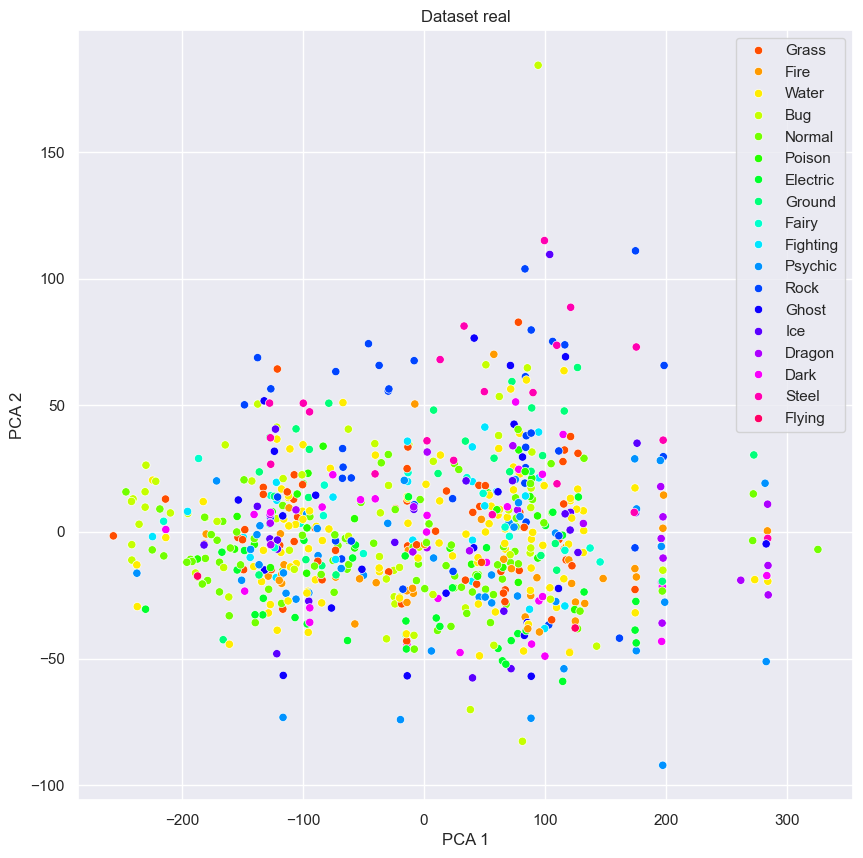

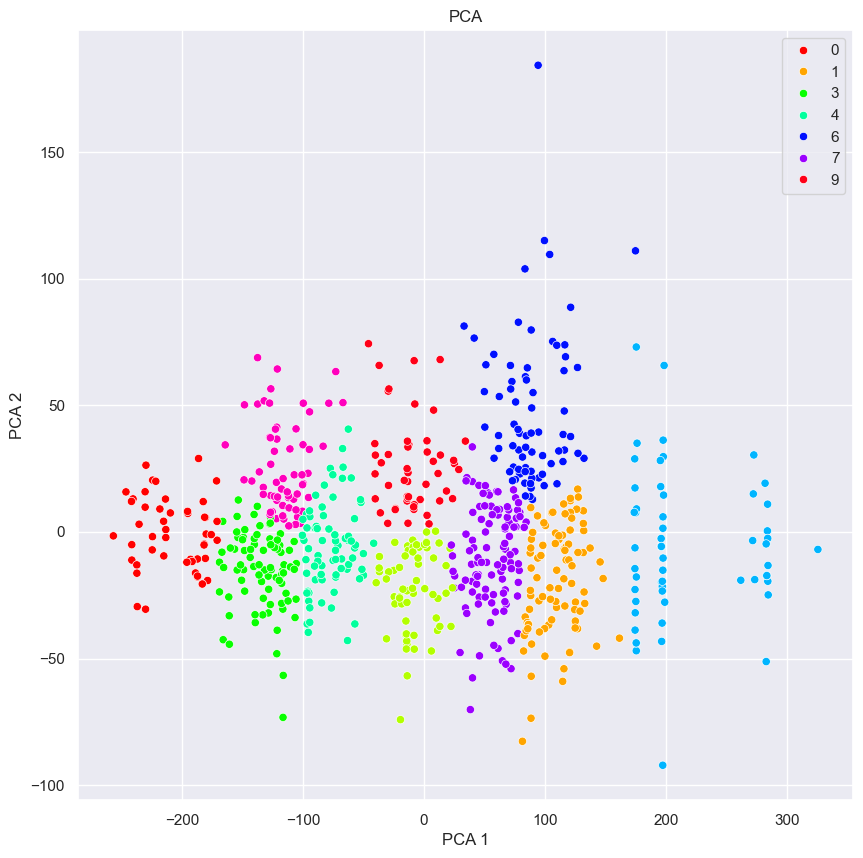

In [459]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradaPCA[:, 0], y=entradaPCA[:, 1], hue=pokedex['Type_1'], palette='hsv')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Dataset real')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradaPCA[:, 0], y=entradaPCA[:, 1], hue=pokedex['KmeansPCA'], palette='hsv')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA')
plt.legend()
plt.show()

In [460]:
print(f'S = {silhouette_score(entradaPCA,kmeansPCA)}')
print(f'DB = {davies_bouldin_score(entradaPCA,kmeansPCA)}')
print(f'CH = {calinski_harabasz_score(entradaPCA,kmeansPCA)}')

S = 0.36994264850193503
DB = 0.8543924161845913
CH = 1251.8858539046678


KMEANS COM FEATURE SCALING

In [461]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeansFS = kmeans.fit_predict(entradaFS)
kmeansFS

array([3, 1, 6, 3, 4, 6, 3, 1, 9, 0, 0, 1, 0, 0, 1, 0, 3, 7, 0, 1, 0, 4,
       3, 1, 3, 7, 8, 4, 8, 3, 6, 8, 3, 7, 3, 6, 3, 6, 0, 4, 0, 7, 3, 1,
       6, 3, 1, 3, 7, 8, 1, 8, 4, 3, 7, 8, 7, 3, 7, 8, 4, 6, 3, 1, 6, 8,
       4, 6, 8, 4, 7, 1, 9, 8, 4, 7, 4, 7, 8, 7, 3, 7, 3, 8, 4, 3, 6, 3,
       6, 8, 4, 8, 4, 7, 4, 1, 9, 8, 4, 3, 7, 8, 7, 3, 1, 9, 9, 1, 8, 7,
       8, 4, 9, 4, 7, 8, 4, 3, 1, 3, 6, 9, 7, 6, 6, 6, 7, 7, 0, 6, 6, 8,
       3, 6, 6, 9, 1, 3, 7, 8, 7, 7, 9, 5, 2, 2, 3, 1, 2, 2, 2, 3, 1, 6,
       3, 4, 6, 8, 4, 6, 0, 4, 3, 6, 3, 9, 0, 4, 7, 3, 7, 0, 0, 0, 3, 9,
       8, 7, 8, 3, 6, 6, 0, 1, 4, 6, 3, 3, 6, 3, 0, 1, 4, 0, 4, 6, 5, 4,
       9, 1, 8, 4, 4, 8, 4, 4, 4, 7, 8, 4, 4, 7, 5, 6, 1, 3, 7, 0, 1, 0,
       4, 1, 8, 7, 8, 5, 7, 3, 7, 6, 8, 7, 6, 7, 0, 0, 9, 3, 3, 3, 7, 5,
       2, 7, 2, 3, 1, 2, 5, 5, 2, 3, 4, 6, 3, 4, 7, 3, 1, 6, 0, 4, 0, 4,
       0, 0, 4, 0, 1, 0, 3, 6, 0, 8, 7, 0, 4, 0, 1, 0, 3, 9, 3, 1, 3, 4,
       8, 4, 2, 0, 4, 0, 0, 8, 7, 0, 4, 0, 1, 0, 4,

In [462]:
pokedex['KmeansFS'] = kmeansFS
pokedex.iloc[:,[1,24]]

Name  KmeansFS
0     Bulbasaur         3
1       Ivysaur         1
2      Venusaur         6
3    Charmander         3
4    Charmeleon         4
..          ...       ...
716     Yveltal         2
717     Zygarde         2
718     Diancie         5
719       Hoopa         5
720   Volcanion         2

[721 rows x 2 columns]

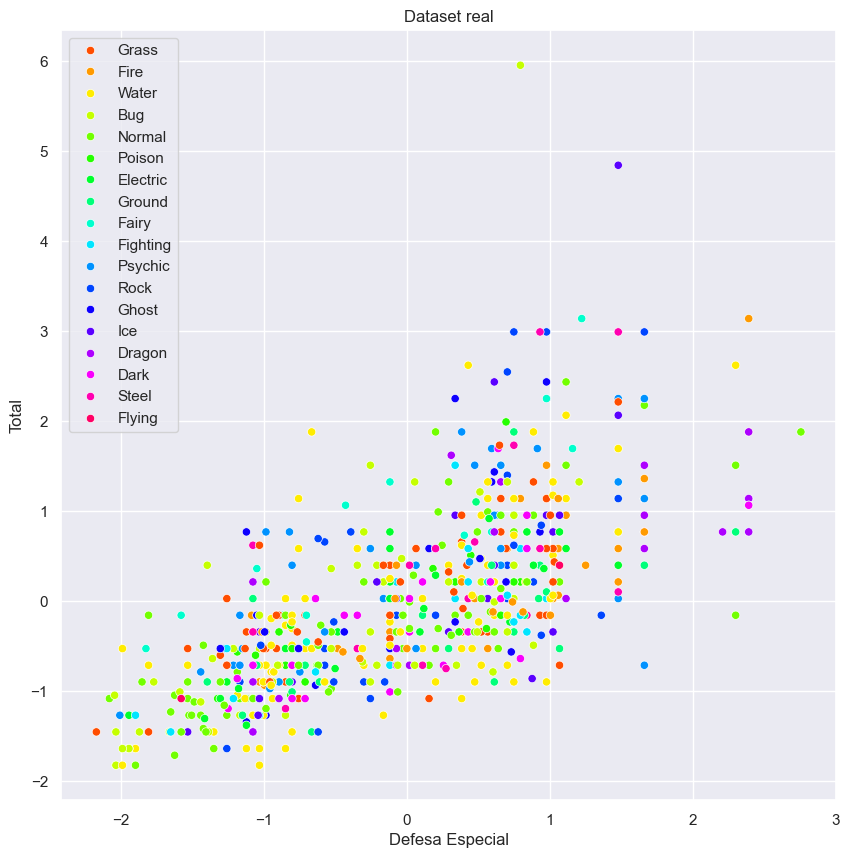

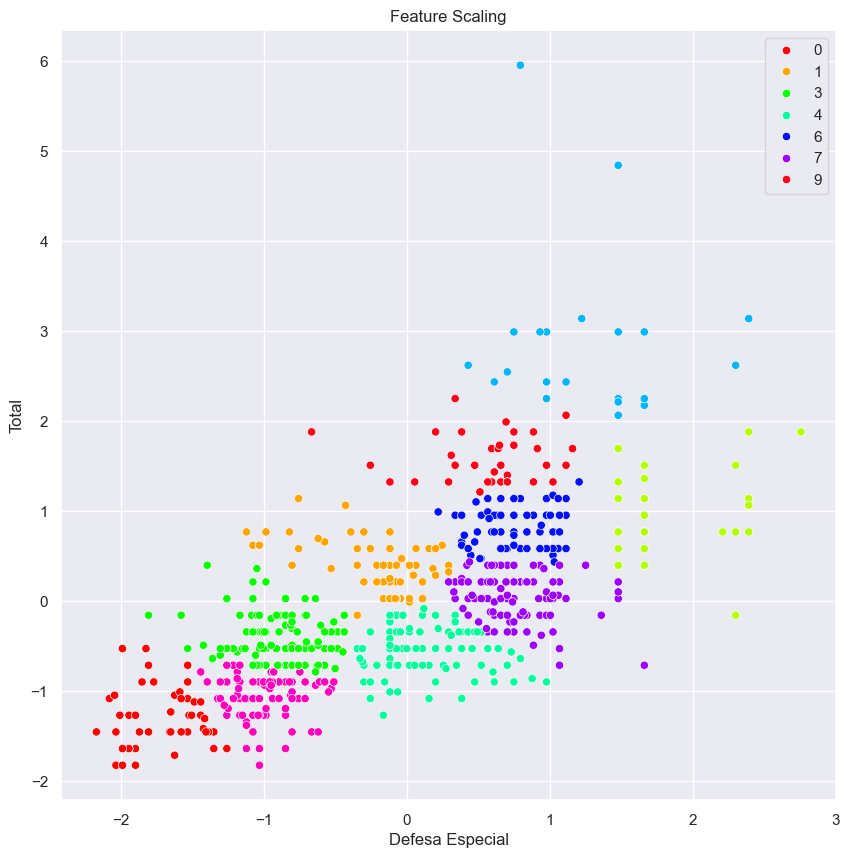

In [463]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradaFS[:, 0], y=entradaFS[:, 1], hue=pokedex['Type_1'], palette='hsv')
plt.xlabel('Defesa Especial')
plt.ylabel('Total')
plt.title('Dataset real')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradaFS[:, 0], y=entradaFS[:, 1], hue=pokedex['KmeansFS'], palette='hsv')
plt.xlabel('Defesa Especial')
plt.ylabel('Total')
plt.title('Feature Scaling')
plt.legend()
plt.show()

In [464]:
print(f'S = {silhouette_score(entradaFS,kmeansFS)}')
print(f'DB = {davies_bouldin_score(entradaFS,kmeansFS)}')
print(f'CH = {calinski_harabasz_score(entradaFS,kmeansFS)}')

S = 0.34769625823868605
DB = 0.8454049216390963
CH = 779.6307123297586


KMEANS SEM NADA

In [465]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeanspadrao = kmeans.fit_predict(entradapadrao)
kmeanspadrao

array([8, 6, 9, 8, 6, 9, 8, 6, 9, 0, 0, 6, 0, 0, 6, 0, 3, 1, 0, 6, 4, 6,
       4, 6, 8, 1, 4, 1, 4, 3, 9, 4, 3, 9, 8, 1, 8, 7, 4, 6, 0, 1, 8, 6,
       1, 4, 6, 8, 1, 4, 6, 4, 6, 8, 1, 4, 1, 3, 9, 4, 3, 9, 8, 6, 7, 4,
       6, 9, 4, 3, 1, 8, 7, 4, 3, 1, 6, 1, 8, 1, 8, 1, 3, 8, 1, 8, 1, 8,
       7, 4, 9, 8, 6, 1, 3, 8, 7, 8, 1, 8, 1, 8, 9, 8, 6, 7, 7, 3, 8, 1,
       3, 1, 7, 6, 1, 4, 6, 8, 1, 8, 9, 7, 1, 1, 1, 1, 1, 1, 0, 9, 9, 4,
       8, 9, 9, 9, 6, 3, 1, 3, 1, 9, 9, 2, 2, 2, 4, 6, 2, 5, 2, 8, 6, 9,
       8, 6, 9, 8, 6, 9, 0, 6, 4, 6, 4, 6, 0, 3, 9, 8, 1, 0, 0, 0, 0, 6,
       8, 1, 4, 3, 9, 7, 0, 6, 6, 7, 0, 8, 1, 3, 0, 6, 3, 0, 6, 9, 7, 6,
       7, 6, 8, 6, 1, 4, 1, 6, 6, 9, 4, 1, 6, 1, 7, 7, 6, 8, 1, 0, 6, 0,
       1, 3, 4, 1, 8, 7, 1, 8, 1, 9, 8, 1, 9, 1, 0, 0, 7, 8, 3, 3, 1, 7,
       2, 2, 2, 4, 6, 2, 5, 5, 2, 8, 6, 9, 8, 6, 9, 8, 6, 9, 0, 6, 0, 6,
       0, 0, 6, 0, 6, 0, 8, 7, 0, 8, 1, 4, 6, 4, 6, 0, 4, 7, 4, 6, 4, 1,
       4, 6, 5, 4, 1, 0, 0, 3, 1, 0, 1, 0, 3, 4, 3,

In [466]:
pokedex['KmeansPadrao'] = kmeanspadrao
pokedex.iloc[:,[1,25]]

Name  KmeansPadrao
0     Bulbasaur             8
1       Ivysaur             6
2      Venusaur             9
3    Charmander             8
4    Charmeleon             6
..          ...           ...
716     Yveltal             5
717     Zygarde             2
718     Diancie             2
719       Hoopa             2
720   Volcanion             2

[721 rows x 2 columns]

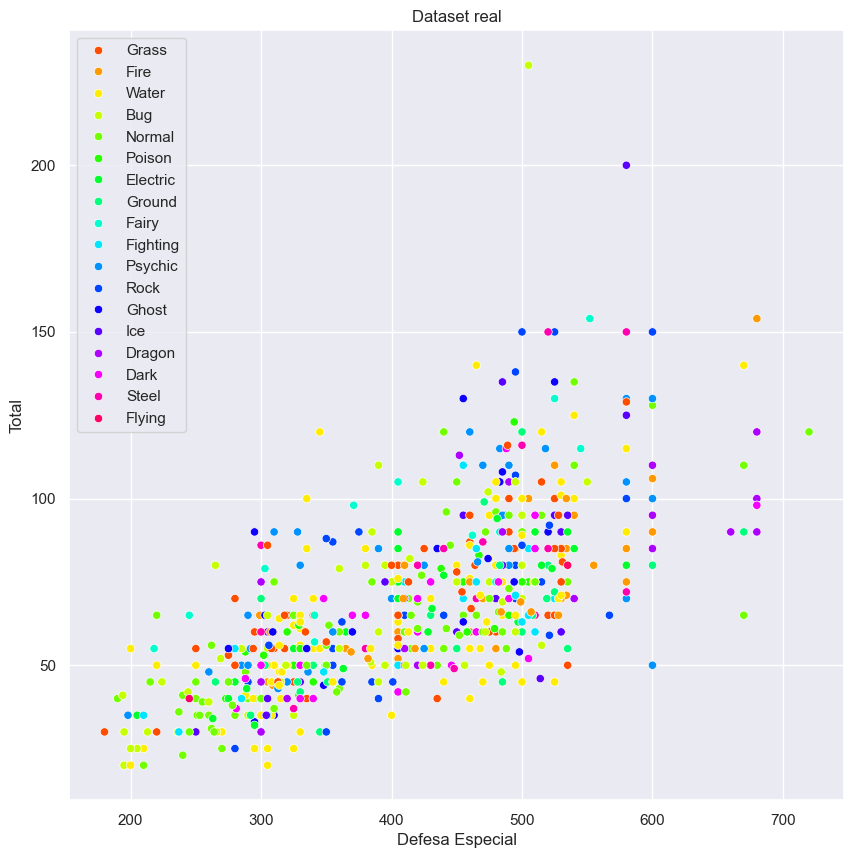

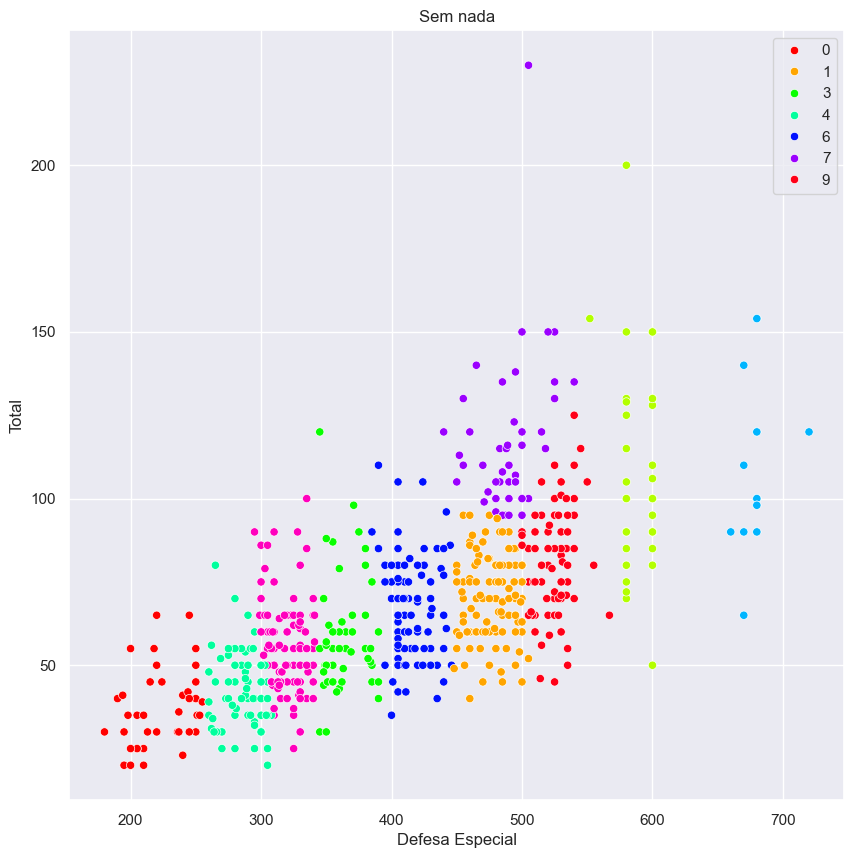

In [467]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradapadrao[:, 0], y=entradapadrao[:, 1], hue=pokedex['Type_1'], palette='hsv')
plt.xlabel('Defesa Especial')
plt.ylabel('Total')
plt.title('Dataset real')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradapadrao[:, 0], y=entradapadrao[:, 1], hue=pokedex['KmeansPadrao'], palette='hsv')
plt.xlabel('Defesa Especial')
plt.ylabel('Total')
plt.title('Sem nada')
plt.legend()
plt.show()

In [468]:
print(f'S = {silhouette_score(entradapadrao,kmeanspadrao)}')
print(f'DB = {davies_bouldin_score(entradapadrao,kmeanspadrao)}')
print(f'CH = {calinski_harabasz_score(entradapadrao,kmeanspadrao)}')

S = 0.402580086609393
DB = 0.7794455701293137
CH = 2020.2450108451878


AGGLOMERATIVE CLUSTER COM PCA

In [469]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=5)
ACPCA = AC.fit_predict(entradaPCA)
ACPCA

array([1, 3, 0, 1, 3, 0, 1, 3, 0, 4, 4, 3, 4, 4, 3, 4, 1, 0, 4, 3, 4, 0,
       4, 0, 1, 0, 1, 3, 4, 1, 0, 4, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 1, 3,
       0, 1, 3, 1, 0, 4, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 3, 0, 1,
       3, 0, 1, 3, 0, 1, 0, 1, 3, 0, 3, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 3, 0, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 3, 3, 1, 0,
       1, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 3, 2, 2, 2, 1, 3, 0,
       1, 3, 0, 1, 3, 0, 4, 3, 4, 0, 4, 3, 4, 3, 0, 1, 0, 4, 4, 4, 4, 3,
       1, 0, 4, 1, 0, 0, 4, 3, 3, 0, 4, 1, 0, 1, 4, 3, 3, 4, 3, 0, 0, 3,
       0, 0, 1, 3, 0, 1, 0, 3, 3, 0, 1, 3, 3, 0, 0, 0, 0, 1, 0, 4, 3, 4,
       3, 3, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 4, 3, 1, 1, 1, 0, 0,
       2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 3, 0, 1, 3, 0, 1, 3, 0, 4, 3, 4, 3,
       4, 4, 3, 4, 3, 4, 1, 0, 4, 1, 0, 4, 0, 4, 3, 4, 4, 0, 4, 3, 1, 0,
       1, 0, 2, 4, 0, 4, 4, 1, 0, 4, 0, 4, 3, 4, 3,

In [470]:
pokedex['AggloPCA'] = ACPCA
pokedex.iloc[:, [1, 26]]

Name  AggloPCA
0     Bulbasaur         1
1       Ivysaur         3
2      Venusaur         0
3    Charmander         1
4    Charmeleon         3
..          ...       ...
716     Yveltal         2
717     Zygarde         2
718     Diancie         0
719       Hoopa         2
720   Volcanion         2

[721 rows x 2 columns]

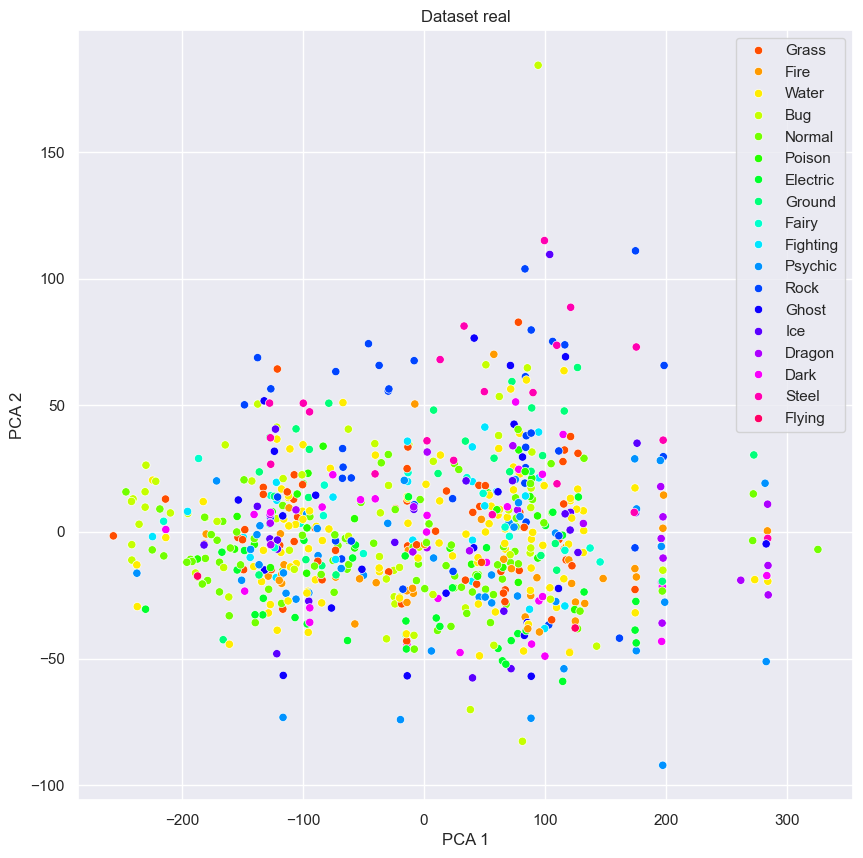

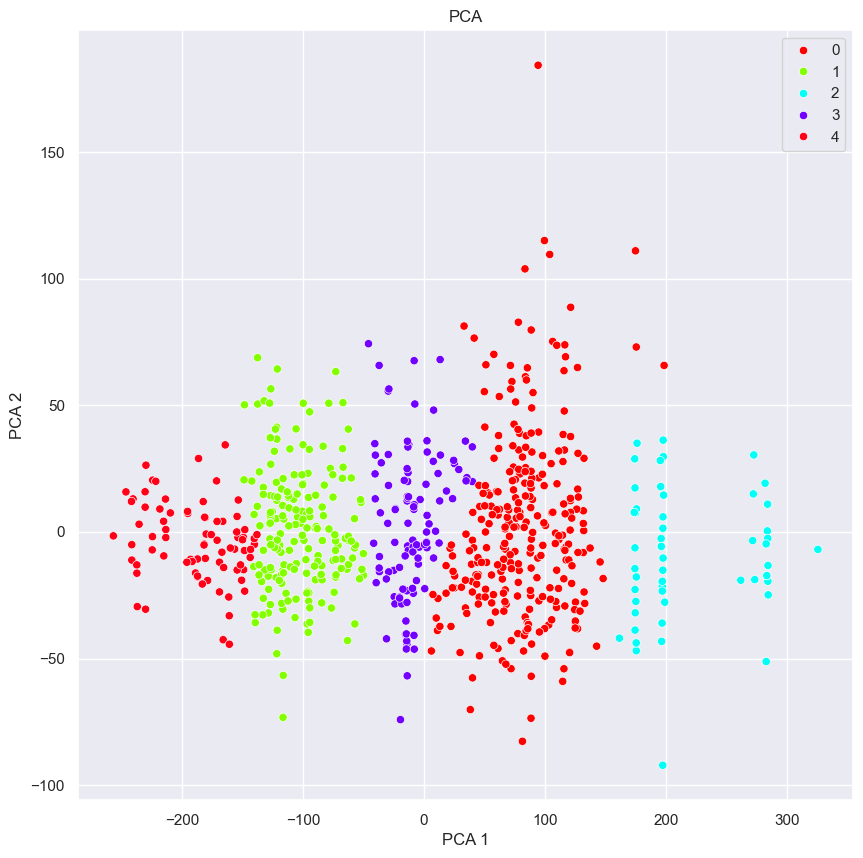

In [471]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradaPCA[:, 0], y=entradaPCA[:, 1], hue=pokedex['Type_1'], palette='hsv')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Dataset real')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradaPCA[:, 0], y=entradaPCA[:, 1], hue=pokedex['AggloPCA'], palette='hsv')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA')
plt.legend()
plt.show()

In [472]:
print(f'S = {silhouette_score(entradaPCA,ACPCA)}')
print(f'DB = {davies_bouldin_score(entradaPCA,ACPCA)}')
print(f'CH = {calinski_harabasz_score(entradaPCA,ACPCA)}')

S = 0.40589770006142795
DB = 0.750138248245195
CH = 1311.1384193950505


AGGLOMERATIVE CLUSTER COM FEATURE SCALING

In [473]:
AC = AgglomerativeClustering(n_clusters=3)
ACFS = AC.fit_predict(entradaFS)
ACFS

array([1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1,
       0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0,
       1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1,
       1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,

In [474]:
pokedex['AggloFS'] = ACFS
pokedex.iloc[:, [1, 27]]

Name  AggloFS
0     Bulbasaur        1
1       Ivysaur        0
2      Venusaur        2
3    Charmander        1
4    Charmeleon        0
..          ...      ...
716     Yveltal        2
717     Zygarde        2
718     Diancie        2
719       Hoopa        2
720   Volcanion        2

[721 rows x 2 columns]

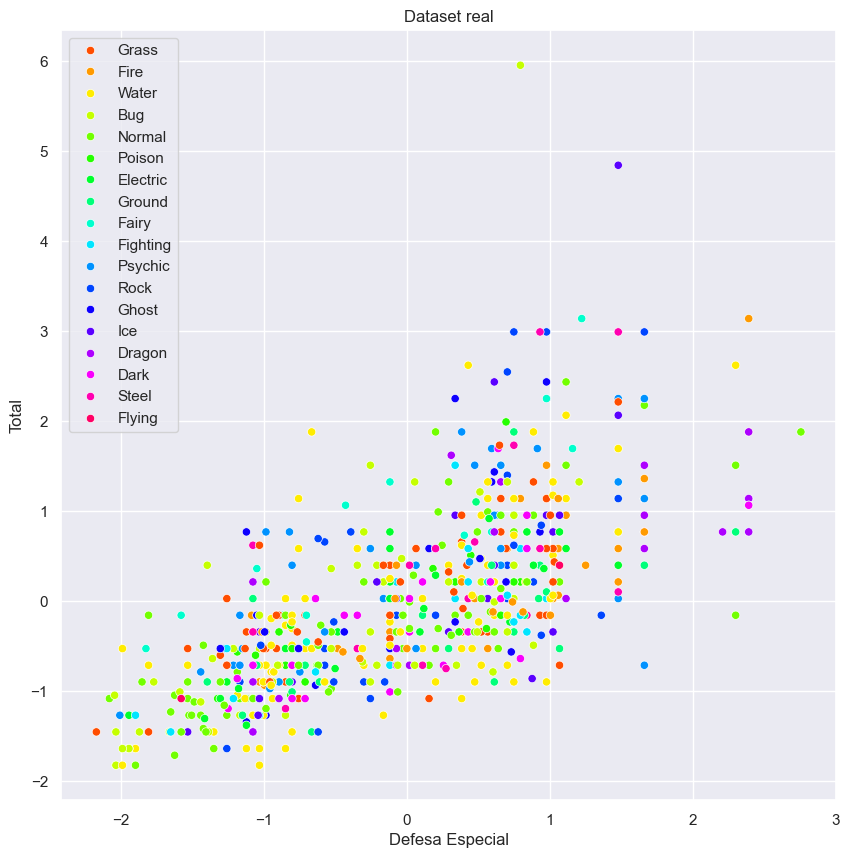

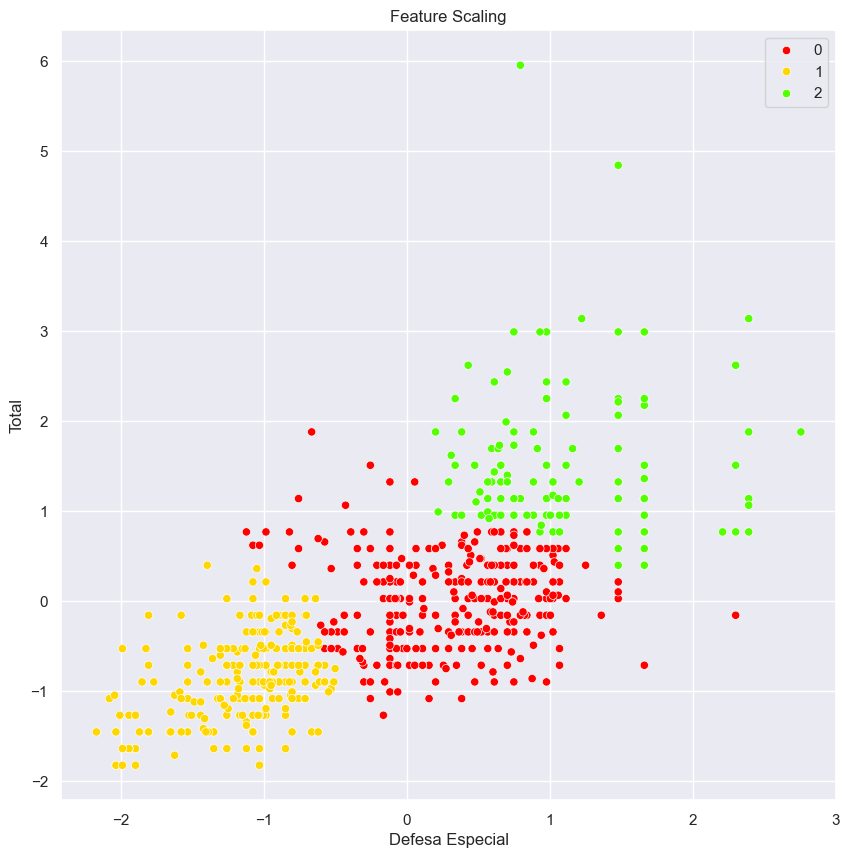

In [475]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradaFS[:, 0], y=entradaFS[:, 1], hue=pokedex['Type_1'], palette='hsv')
plt.xlabel('Defesa Especial')
plt.ylabel('Total')
plt.title('Dataset real')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradaFS[:, 0], y=entradaFS[:, 1], hue=pokedex['AggloFS'], palette='prism')
plt.xlabel('Defesa Especial')
plt.ylabel('Total')
plt.title('Feature Scaling')
plt.legend()
plt.show()

In [476]:
print(f'S = {silhouette_score(entradaFS, ACFS)}')
print(f'DB = {davies_bouldin_score(entradaFS, ACFS)}')
print(f'CH = {calinski_harabasz_score(entradaFS, ACFS)}')

S = 0.4325093122132345
DB = 0.8149749408329169
CH = 924.0226943377795


AGGLOMERATIVE CLUSTER SEM NADA

In [477]:
AC = AgglomerativeClustering(n_clusters=5)
ACpadrao = AC.fit_predict(entradapadrao)
ACpadrao

array([0, 3, 1, 0, 3, 1, 0, 3, 1, 4, 4, 3, 4, 4, 3, 4, 0, 1, 4, 3, 4, 3,
       0, 3, 0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 4, 3, 4, 1, 0, 3,
       1, 0, 3, 0, 1, 4, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 3, 1, 0,
       3, 1, 0, 3, 1, 0, 1, 0, 3, 1, 3, 1, 0, 1, 0, 1, 0, 0, 3, 0, 1, 0,
       1, 0, 1, 0, 3, 1, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 1, 1, 3, 0, 1,
       0, 1, 1, 3, 1, 0, 3, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0,
       0, 1, 1, 1, 3, 0, 1, 0, 1, 1, 1, 2, 2, 2, 0, 3, 2, 2, 2, 0, 3, 1,
       0, 3, 1, 0, 3, 1, 4, 3, 4, 3, 0, 3, 4, 0, 1, 0, 1, 4, 4, 4, 4, 3,
       0, 1, 0, 0, 1, 1, 4, 3, 3, 1, 4, 0, 1, 0, 4, 3, 3, 4, 3, 1, 1, 3,
       1, 3, 0, 3, 3, 0, 1, 3, 3, 1, 0, 3, 3, 1, 1, 1, 3, 0, 1, 4, 3, 4,
       3, 3, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 4, 4, 1, 0, 0, 0, 1, 1,
       2, 2, 2, 0, 3, 2, 2, 2, 2, 0, 3, 1, 0, 3, 1, 0, 3, 1, 4, 3, 4, 3,
       4, 4, 3, 4, 3, 4, 0, 1, 4, 0, 1, 4, 3, 4, 3, 4, 0, 1, 4, 3, 0, 3,
       0, 3, 2, 4, 3, 4, 4, 0, 1, 4, 1, 4, 3, 4, 0,

In [478]:
pokedex['AggloPadrao'] = ACpadrao
pokedex.iloc[:, [1, 28]]

Name  AggloPadrao
0     Bulbasaur            0
1       Ivysaur            3
2      Venusaur            1
3    Charmander            0
4    Charmeleon            3
..          ...          ...
716     Yveltal            2
717     Zygarde            2
718     Diancie            2
719       Hoopa            2
720   Volcanion            2

[721 rows x 2 columns]

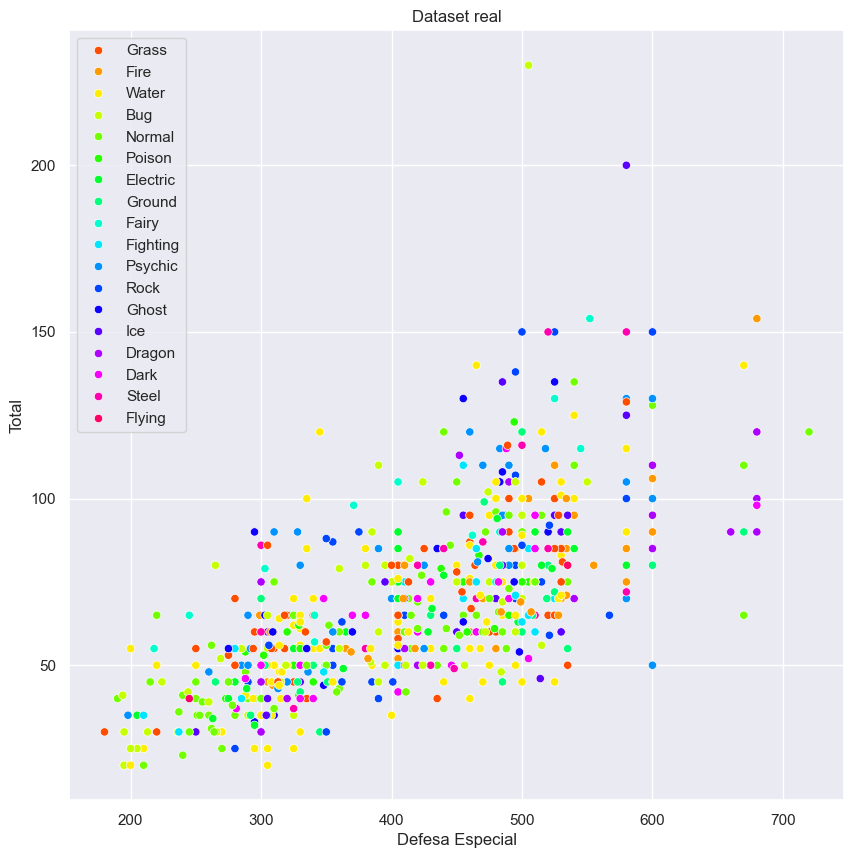

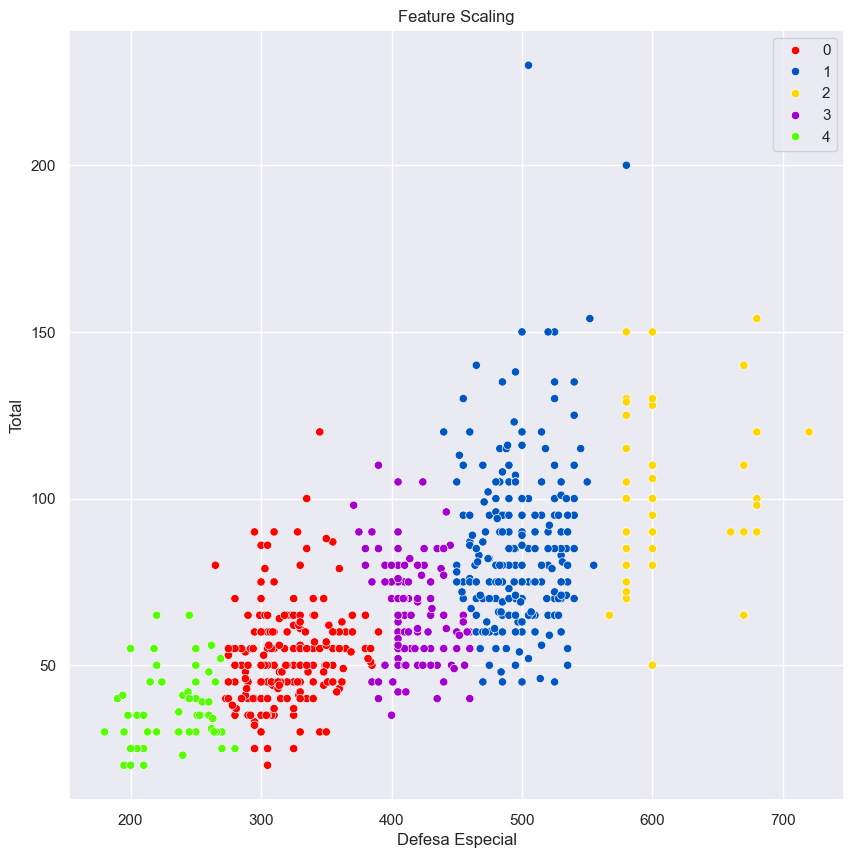

In [479]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradapadrao[:, 0], y=entradapadrao[:, 1], hue=pokedex['Type_1'], palette='hsv')
plt.xlabel('Defesa Especial')
plt.ylabel('Total')
plt.title('Dataset real')
plt.legend()
plt.show()

plt.figure(figsize=(10, 10))
sns.scatterplot(x=entradapadrao[:, 0], y=entradapadrao[:, 1], hue=pokedex['AggloPadrao'], palette='prism')
plt.xlabel('Defesa Especial')
plt.ylabel('Total')
plt.title('Feature Scaling')
plt.legend()
plt.show()

In [480]:
print(f'S = {silhouette_score(entradapadrao, ACpadrao)}')
print(f'DB = {davies_bouldin_score(entradapadrao, ACpadrao)}')
print(f'CH = {calinski_harabasz_score(entradapadrao, ACpadrao)}')

S = 0.48189968644461856
DB = 0.6170239515863056
CH = 1906.9127314578022
